This notebook contains the comparaison between observed and modeled NEX GDDP CMIP6 data.

Notice: The modeled data only contains one point. Good to do it again but with a zone

# Packages and functions

In [1]:
import pandas as pd
import numpy as np
import os
import os.path
import seaborn as sns
import matplotlib
import geopy.distance
from matplotlib import pyplot as plt

from Functions_ImportData import import_CMIP6_past_close_to_NOAA
from Functions_ImportData import import_filtered_NOAA_obs

from Functions_Indicators import add_year_month_season
from Functions_Indicators import str_month
from Functions_Indicators import select_station

from Graphs_functions import cdf_plot_category_or_obs
from Graphs_functions import boxplots_
from Graphs_functions import compare_3_lines

# Path and user input

In [2]:
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets'

# Import data

## Observations data

### Precipitation and temperature NOAA

In [3]:
df_NOAA=import_filtered_NOAA_obs()

In [4]:
df_NOAA_BEIRA=select_station(df_NOAA,'NAME','BEIRA, MZ')
df_NOAA_PEMBA=select_station(df_NOAA,'NAME','PEMBA, MZ')
df_NOAA_CHIMOIO=select_station(df_NOAA,'NAME','CHIMOIO, MZ')

## Modeled CMIP6 data

### Precipitation

In [5]:
df_pr_CMIP6 = import_CMIP6_past_close_to_NOAA('pr')

In [6]:
df_pr_CMIP6

,Name project,Latitude,Longitude,Experiment,Model,Date,precipitation mm_per_day,Year,Month,Season
0,"PEMBA, MZ",-13.12500,40.3125,historical,access_cm2,1950-01-01,0.017013,1950,Jan,Humid
1,"PEMBA, MZ",-13.12500,40.3125,historical,access_cm2,1950-01-02,0.020553,1950,Jan,Humid
2,"PEMBA, MZ",-13.12500,40.3125,historical,access_cm2,1950-01-03,0.857223,1950,Jan,Humid
3,"PEMBA, MZ",-13.12500,40.3125,historical,access_cm2,1950-01-04,0.892375,1950,Jan,Humid
4,"PEMBA, MZ",-13.12500,40.3125,historical,access_cm2,1950-01-05,1.082087,1950,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...
2634283,"BEIRA, MZ",-20.26178,35.0000,historical,taiesm1,2014-12-27,3.106209,2014,Dec,Humid
2634284,"BEIRA, MZ",-20.26178,35.0000,historical,taiesm1,2014-12-28,6.153633,2014,Dec,Humid
2634285,"BEIRA, MZ",-20.26178,35.0000,historical,taiesm1,2014-12-29,4.835697,2014,Dec,Humid
2634286,"BEIRA, MZ",-20.26178,35.0000,historical,taiesm1,2014-12-30,0.015595,2014,Dec,Humid


In [7]:
df_pr_CMIP6_BEIRA=select_station(df_pr_CMIP6,'Name project','BEIRA, MZ')
df_pr_CMIP6_PEMBA=select_station(df_pr_CMIP6,'Name project','PEMBA, MZ')
df_pr_CMIP6_CHIMOIO=select_station(df_pr_CMIP6,'Name project','CHIMOIO, MZ')

### Temperature

In [8]:
df_tas_CMIP6 = import_CMIP6_past_close_to_NOAA('temperature',climate_var='near_surface_air_temperature')

In [9]:
df_tas_CMIP6_BEIRA=select_station(df_tas_CMIP6,'Name project','BEIRA, MZ')
df_tas_CMIP6_PEMBA=select_station(df_tas_CMIP6,'Name project','PEMBA, MZ')
df_tas_CMIP6_CHIMOIO=select_station(df_tas_CMIP6,'Name project','CHIMOIO, MZ')

### Maximum temperature

In [10]:
df_tasmax_CMIP6 = import_CMIP6_past_close_to_NOAA('temperature',climate_var='daily_minimum_near_surface_air_temperature')

In [11]:
df_tasmax_CMIP6_BEIRA=select_station(df_tasmax_CMIP6,'Name project','BEIRA, MZ')
df_tasmax_CMIP6_PEMBA=select_station(df_tasmax_CMIP6,'Name project','PEMBA, MZ')
df_tasmax_CMIP6_CHIMOIO=select_station(df_tasmax_CMIP6,'Name project','CHIMOIO, MZ')

### Minimum temperature

In [12]:
df_tasmin_CMIP6 = import_CMIP6_past_close_to_NOAA('temperature',climate_var='daily_minimum_near_surface_air_temperature')

In [13]:
df_tasmin_CMIP6_BEIRA=select_station(df_tasmin_CMIP6,'Name project','BEIRA, MZ')
df_tasmin_CMIP6_PEMBA=select_station(df_tasmin_CMIP6,'Name project','PEMBA, MZ')
df_tasmin_CMIP6_CHIMOIO=select_station(df_tasmin_CMIP6,'Name project','CHIMOIO, MZ')

# Plots

### Precipitation

In [14]:
#  beira

missing data


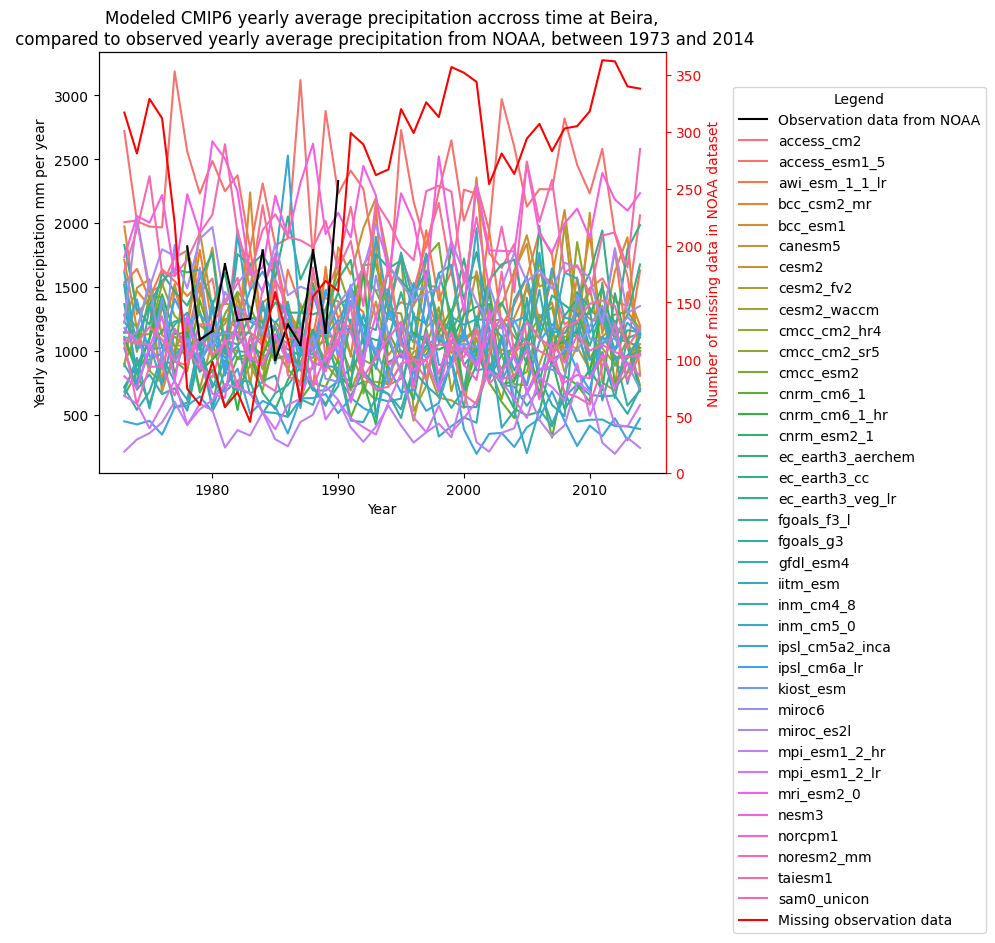

In [15]:
compare_3_lines('test','Mean','precipitation',df_pr_CMIP6_BEIRA[df_pr_CMIP6_BEIRA['Year'].between(1973,2014)],'precipitation mm_per_day','CMIP6',df_NOAA_BEIRA,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Beira')

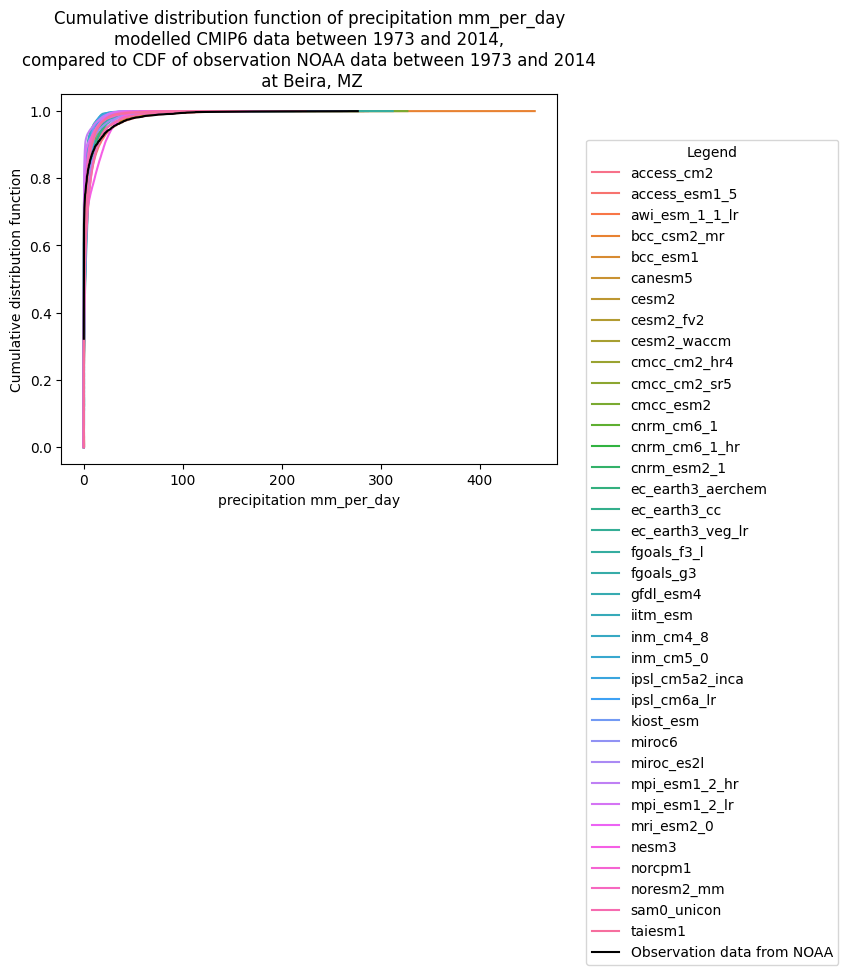

In [16]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=df_pr_CMIP6_BEIRA[df_pr_CMIP6_BEIRA['Year'].between(1973,2014)][['Model','Year','precipitation mm_per_day']],name_column_df='precipitation mm_per_day',source_df='CMIP6',category='Model',obs_initial=df_NOAA_BEIRA,name_column_obs='PRCP',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


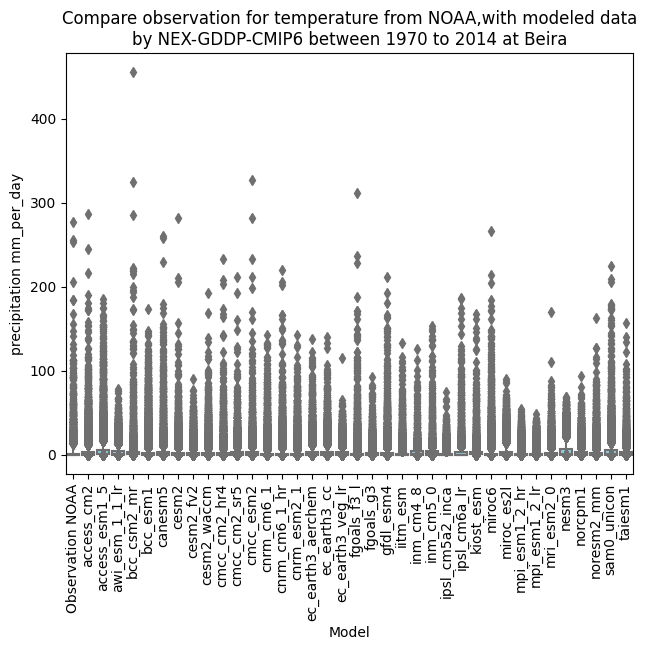

In [17]:
boxplots_('temperature',df_pr_CMIP6_BEIRA[df_pr_CMIP6_BEIRA['Year'].between(1973,2014)],'precipitation mm_per_day',df_NOAA_BEIRA,'PRCP','Beira')

### Temperature

In [18]:
df_tas_CMIP6_BEIRA

,Name project,Latitude,Longitude,Experiment,Model,Date,near_surface_air_temperature °C,Year,Month,Season
47482,"BEIRA, MZ",-19.37500,34.6875,historical,access_cm2,1950-01-01,29.754059,1950,Jan,Humid
47483,"BEIRA, MZ",-19.37500,34.6875,historical,access_cm2,1950-01-02,30.195465,1950,Jan,Humid
47484,"BEIRA, MZ",-19.37500,34.6875,historical,access_cm2,1950-01-03,30.757965,1950,Jan,Humid
47485,"BEIRA, MZ",-19.37500,34.6875,historical,access_cm2,1950-01-04,31.076324,1950,Jan,Humid
47486,"BEIRA, MZ",-19.37500,34.6875,historical,access_cm2,1950-01-05,25.446686,1950,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...
2563111,"BEIRA, MZ",-20.26178,35.0000,historical,taiesm1,2014-12-27,28.826263,2014,Dec,Humid
2563112,"BEIRA, MZ",-20.26178,35.0000,historical,taiesm1,2014-12-28,28.497070,2014,Dec,Humid
2563113,"BEIRA, MZ",-20.26178,35.0000,historical,taiesm1,2014-12-29,29.346588,2014,Dec,Humid
2563114,"BEIRA, MZ",-20.26178,35.0000,historical,taiesm1,2014-12-30,30.883362,2014,Dec,Humid


missing data


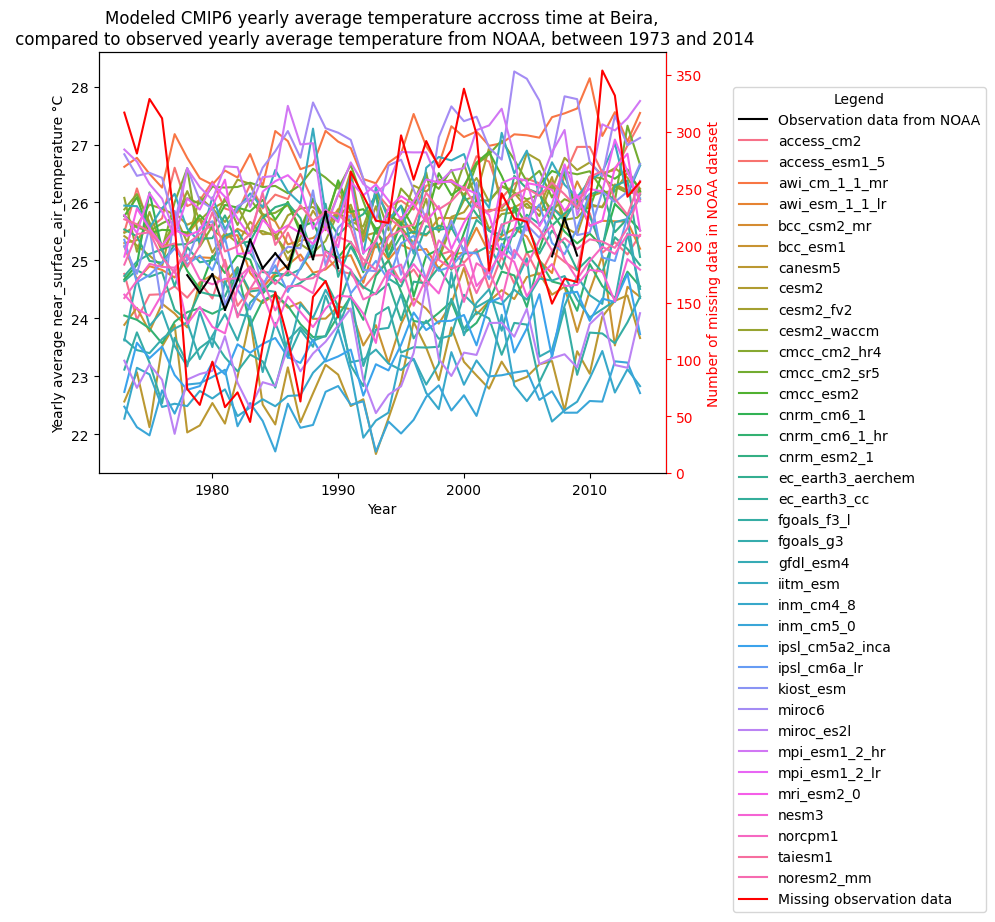

In [19]:
compare_3_lines('test','Mean','temperature',df_tas_CMIP6_BEIRA[df_tas_CMIP6_BEIRA['Year'].between(1973,2014)],'near_surface_air_temperature °C','CMIP6',df_NOAA_BEIRA,'TAVG','NOAA','Annual mean daily temperature °C','Beira')

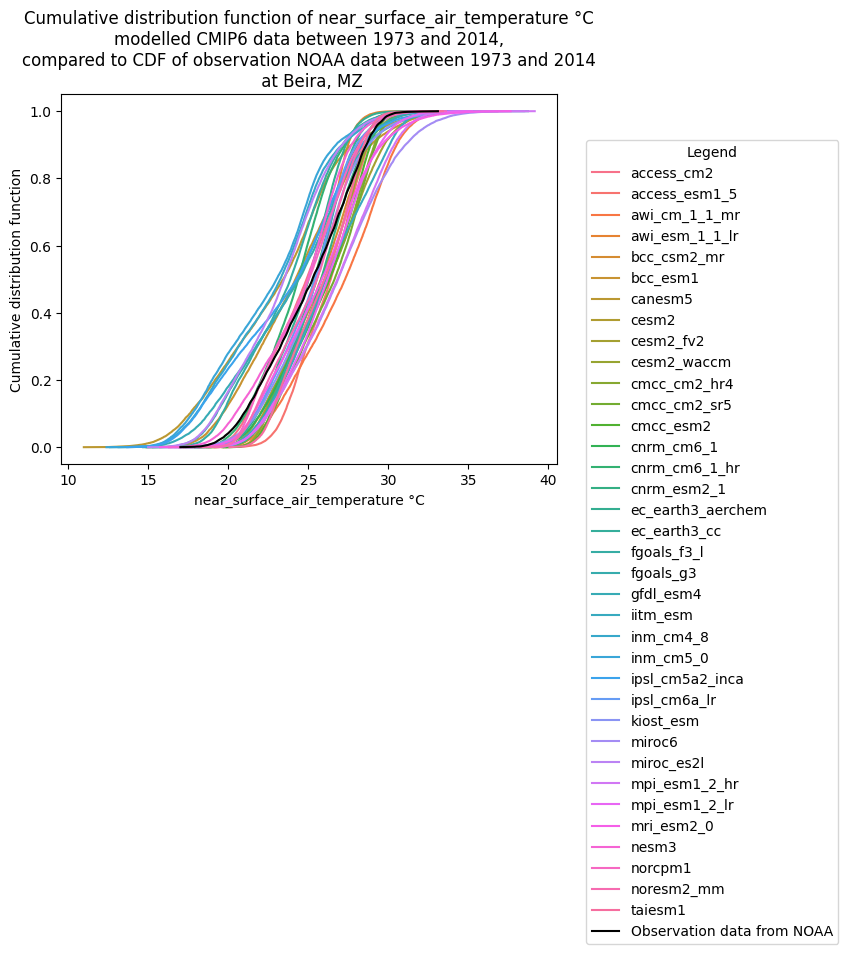

In [20]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=df_tas_CMIP6_BEIRA[df_tas_CMIP6_BEIRA['Year'].between(1973,2014)][['Model','Year','near_surface_air_temperature °C']],name_column_df='near_surface_air_temperature °C',source_df='CMIP6',category='Model',obs_initial=df_NOAA_BEIRA,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',df_tas_CMIP6_BEIRA[df_tas_CMIP6_BEIRA['Year'].between(1973,2014)],'near_surface_air_temperature °C',df_NOAA_BEIRA,'TAVG','Beira')

### Maximum temperature

### Minimum temperature